# **🗃️ Data Loading**

Useful dataset:
- [Toyota Cars](https://drive.google.com/file/d/1mPrg8J272y9EOOE0GdGjybDCOUmj9Wf6/view?usp=sharing)
- [Houses in Iowa](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv)

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.stats import probplot, norm

import warnings
warnings.filterwarnings('ignore')

## Load data and take a small look

In [3]:
data = pd.read_csv('/content/ToyotaCorolla1.csv')

print (data.columns)
data.head()

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [4]:
# Print information about data variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Age_08_04          1436 non-null   int64 
 4   Mfg_Month          1436 non-null   int64 
 5   Mfg_Year           1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   int64 
 9   Met_Color          1436 non-null   int64 
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Quarterly_Tax      1436 non-null   int64 


count     1436.000000
mean     10730.824513
std       3626.964585
min       4350.000000
25%       8450.000000
50%       9900.000000
75%      11950.000000
max      32500.000000
Name: Price, dtype: float64


<Axes: xlabel='Price', ylabel='Count'>

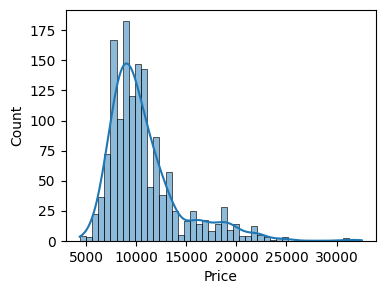

In [5]:
# Show descriptive stats about the dataset
print(data['Price'].describe())

_, ax = plt.subplots(figsize=(4,3))
sns.histplot(data, x="Price", kde=True, ax=ax)

In [6]:
model2key = {}

for i, key in enumerate(np.unique(data.Model)): model2key [key] = i
key2model = dict(zip(model2key.values(), model2key.keys()))

data['Model'] = data['Model'].map(model2key)

In [7]:
fuel2key = {}

for i, key in enumerate(np.unique(data.Fuel_Type)): fuel2key [key] = i
key2fuel = dict(zip(fuel2key.values(), fuel2key.keys()))

data['Fuel_Type'] = data['Fuel_Type'].map(fuel2key)

In [8]:
color2key = {}

for i, key in enumerate(np.unique(data.Color)): color2key [key] = i
key2color = dict(zip(color2key.values(), color2key.keys()))

data['Color'] = data['Color'].map(color2key)

<Axes: >

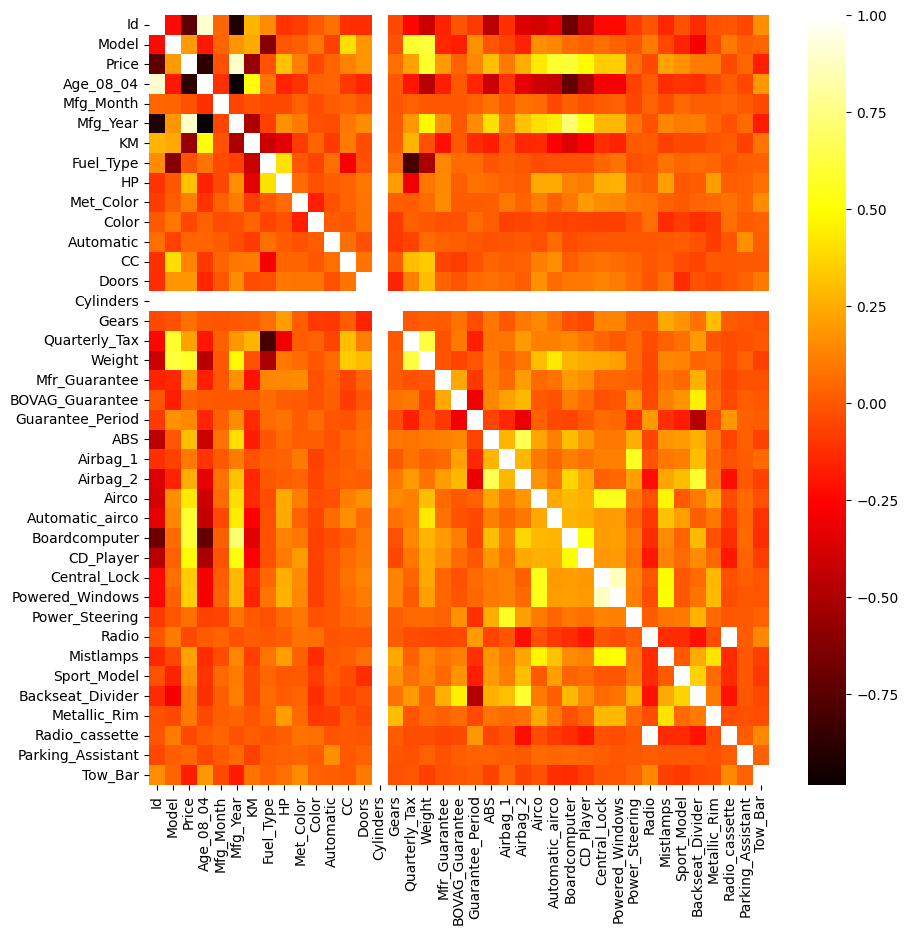

In [9]:
corr = data.corr()
_, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap='hot', ax=ax)

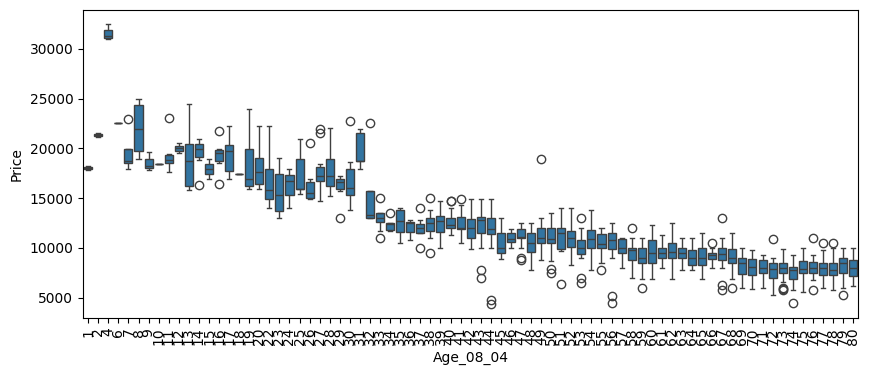

In [40]:
_, ax = plt.subplots(figsize=(10,4))
sns.boxplot(data, x='Age_08_04', y='Price', ax=ax)
_ = plt.xticks(rotation = 90)

<Axes: xlabel='Fuel_Type', ylabel='Price'>

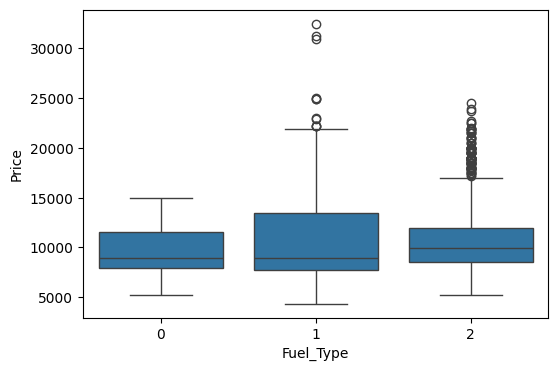

In [16]:
_, ax = plt.subplots(figsize=(6,4))
sns.boxplot(data, x='Fuel_Type', y='Price', ax=ax)

<Axes: xlabel='KM', ylabel='Price'>

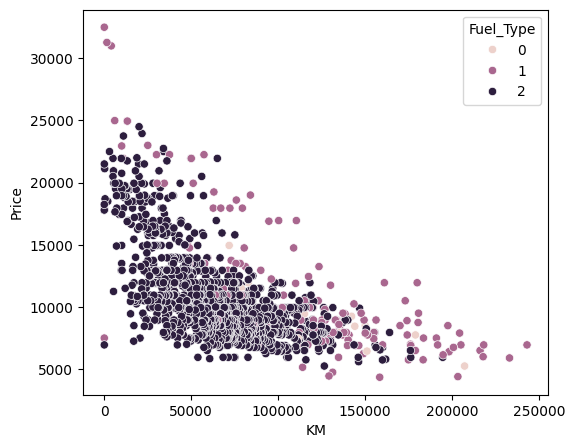

In [17]:
_, ax = plt.subplots(figsize=(6,5))
sns.scatterplot(data, x='KM', y='Price', \
                hue='Fuel_Type', ax=ax)

## Data Cleansing

In [ ]:
data.isnull().sum().sort_values(ascending=False)

In [ ]:
num_missing = data.isnull().sum().sort_values(ascending=False)   # Compute columns with more than 15% missing data
missing_percentage = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
num_missing.head(20)

missing = pd.concat([ num_missing , missing_percentage ], axis = 1, keys=['Total', 'Percentage'])
missing.head(20)

In [20]:
drop_columns = missing[ missing['Percentage']>0.15 ] # List columns with those values
print(drop_columns)

Empty DataFrame
Columns: [Total, Percentage]
Index: []


## Outliers

In [ ]:
data.columns

In [ ]:
scaled_data = StandardScaler().fit_transform(data['Price'].values.reshape(-1,1))

# 10 outliners - we dont have that many
lower_bound = scaled_data[scaled_data[:, 0].argsort()][:1]
upper_bound = scaled_data[scaled_data[:, 0].argsort()][-20:]
print(lower_bound, upper_bound)

<Axes: xlabel='Price', ylabel='Count'>

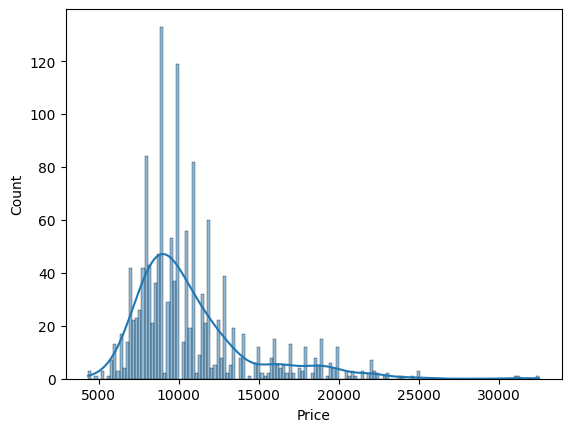

In [33]:
sns.histplot(data, x= 'Price', kde=True, bins=len(np.arange(0,len(data),10)))

## Normality test

In [41]:
data.info()
data_cl = data.select_dtypes(include = ['float64', 'int64']) #Convert values to numbers
data_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Id                 1436 non-null   int64
 1   Model              1436 non-null   int64
 2   Price              1436 non-null   int64
 3   Age_08_04          1436 non-null   int64
 4   Mfg_Month          1436 non-null   int64
 5   Mfg_Year           1436 non-null   int64
 6   KM                 1436 non-null   int64
 7   Fuel_Type          1436 non-null   int64
 8   HP                 1436 non-null   int64
 9   Met_Color          1436 non-null   int64
 10  Color              1436 non-null   int64
 11  Automatic          1436 non-null   int64
 12  CC                 1436 non-null   int64
 13  Doors              1436 non-null   int64
 14  Cylinders          1436 non-null   int64
 15  Gears              1436 non-null   int64
 16  Quarterly_Tax      1436 non-null   int64
 17  Weight        

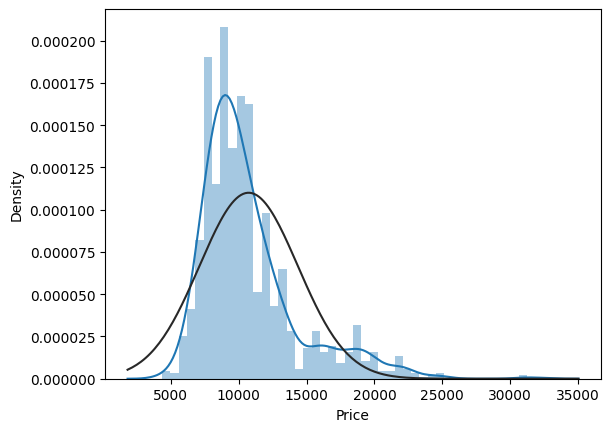

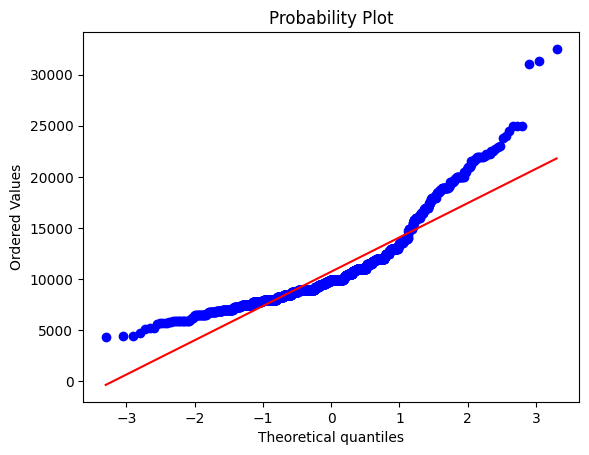

In [42]:
sns.distplot(data_cl['Price'], fit = norm)
fig = plt.figure()
res = probplot(data_cl['Price'],  plot = plt)

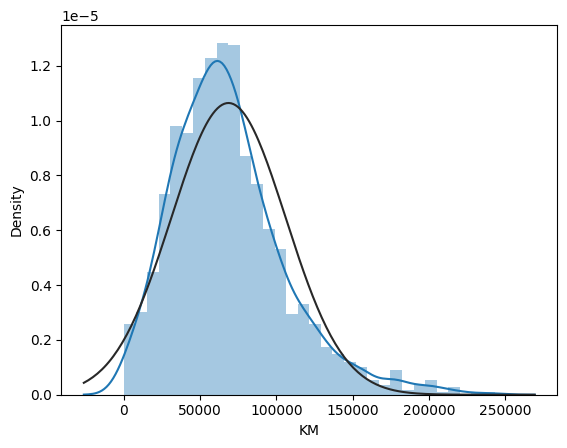

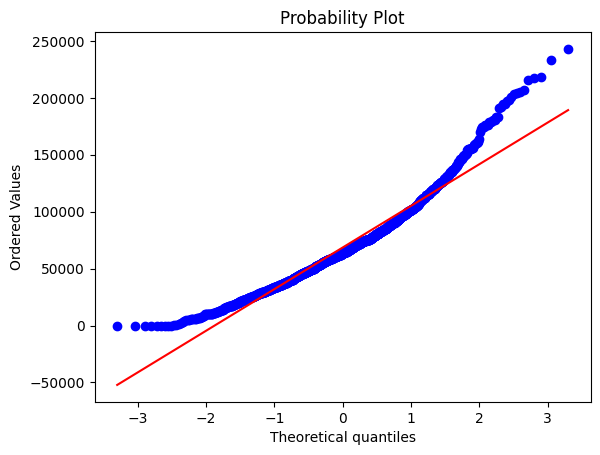

In [44]:
sns.distplot(data_cl['KM'], fit = norm);
fig = plt.figure()
res = probplot(data_cl['KM'], plot = plt)

In [45]:
# Transformación de los datos:
data_cl_tf = data_cl.copy()

for col in data_cl.columns.tolist():
  data_cl_tf[col].loc[data_cl_tf[col] != 0] = np.log(data_cl[col].loc[data_cl[col] != 0]) # Normalize

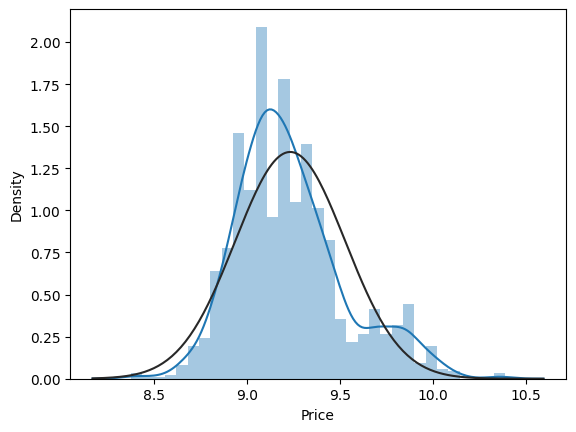

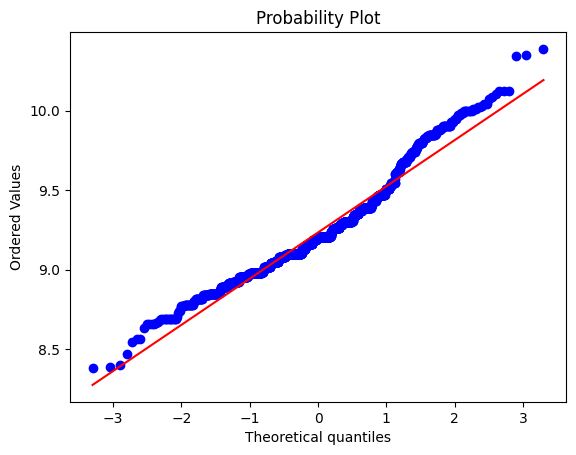

In [46]:
# Histograma y gráfico de probabilidad normal sobre los datos transformados:

sns.distplot(data_cl_tf['Price'], fit = norm);
fig = plt.figure()
res = probplot(data_cl_tf['Price'] , plot = plt)

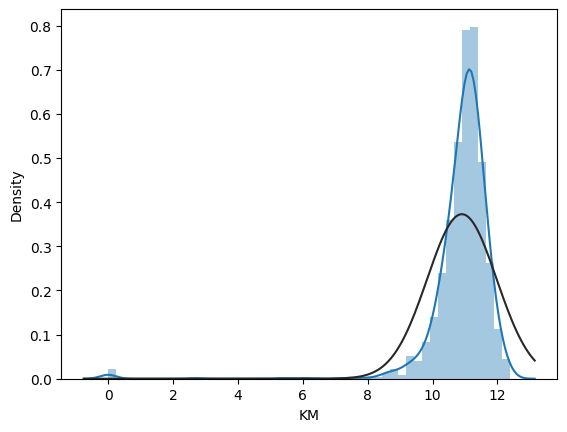

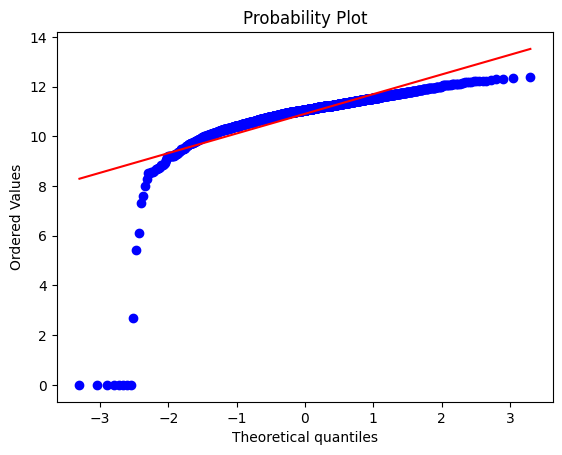

In [47]:
sns.distplot(data_cl_tf['KM'], fit = norm);
fig = plt.figure()
res = probplot(data_cl_tf['KM'], plot = plt)

In [48]:
data_cl_tf.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,0.000000,5.613128,9.510445,3.135494,2.302585,7.601902,10.757605,0.0,4.49981,0,...,0,0,0,0,0,0,0,0,0,0
1,0.693147,5.613128,9.528794,3.135494,2.302585,7.601902,11.197351,0.0,4.49981,0,...,0,0,0,0,0,0,0,0,0,0
2,1.098612,5.613128,9.543235,3.178054,2.197225,7.601902,10.638520,0.0,4.49981,0,...,0,0,0,0,0,0,0,0,0,0
3,1.386294,5.613128,9.612467,3.258097,1.945910,7.601902,10.778956,0.0,4.49981,0,...,0,0,0,0,0,0,0,0,0,0
4,1.609438,5.609472,9.528794,3.401197,1.098612,7.601902,10.558414,0.0,4.49981,0,...,0,0,0,0,0,0,0,0,0,0


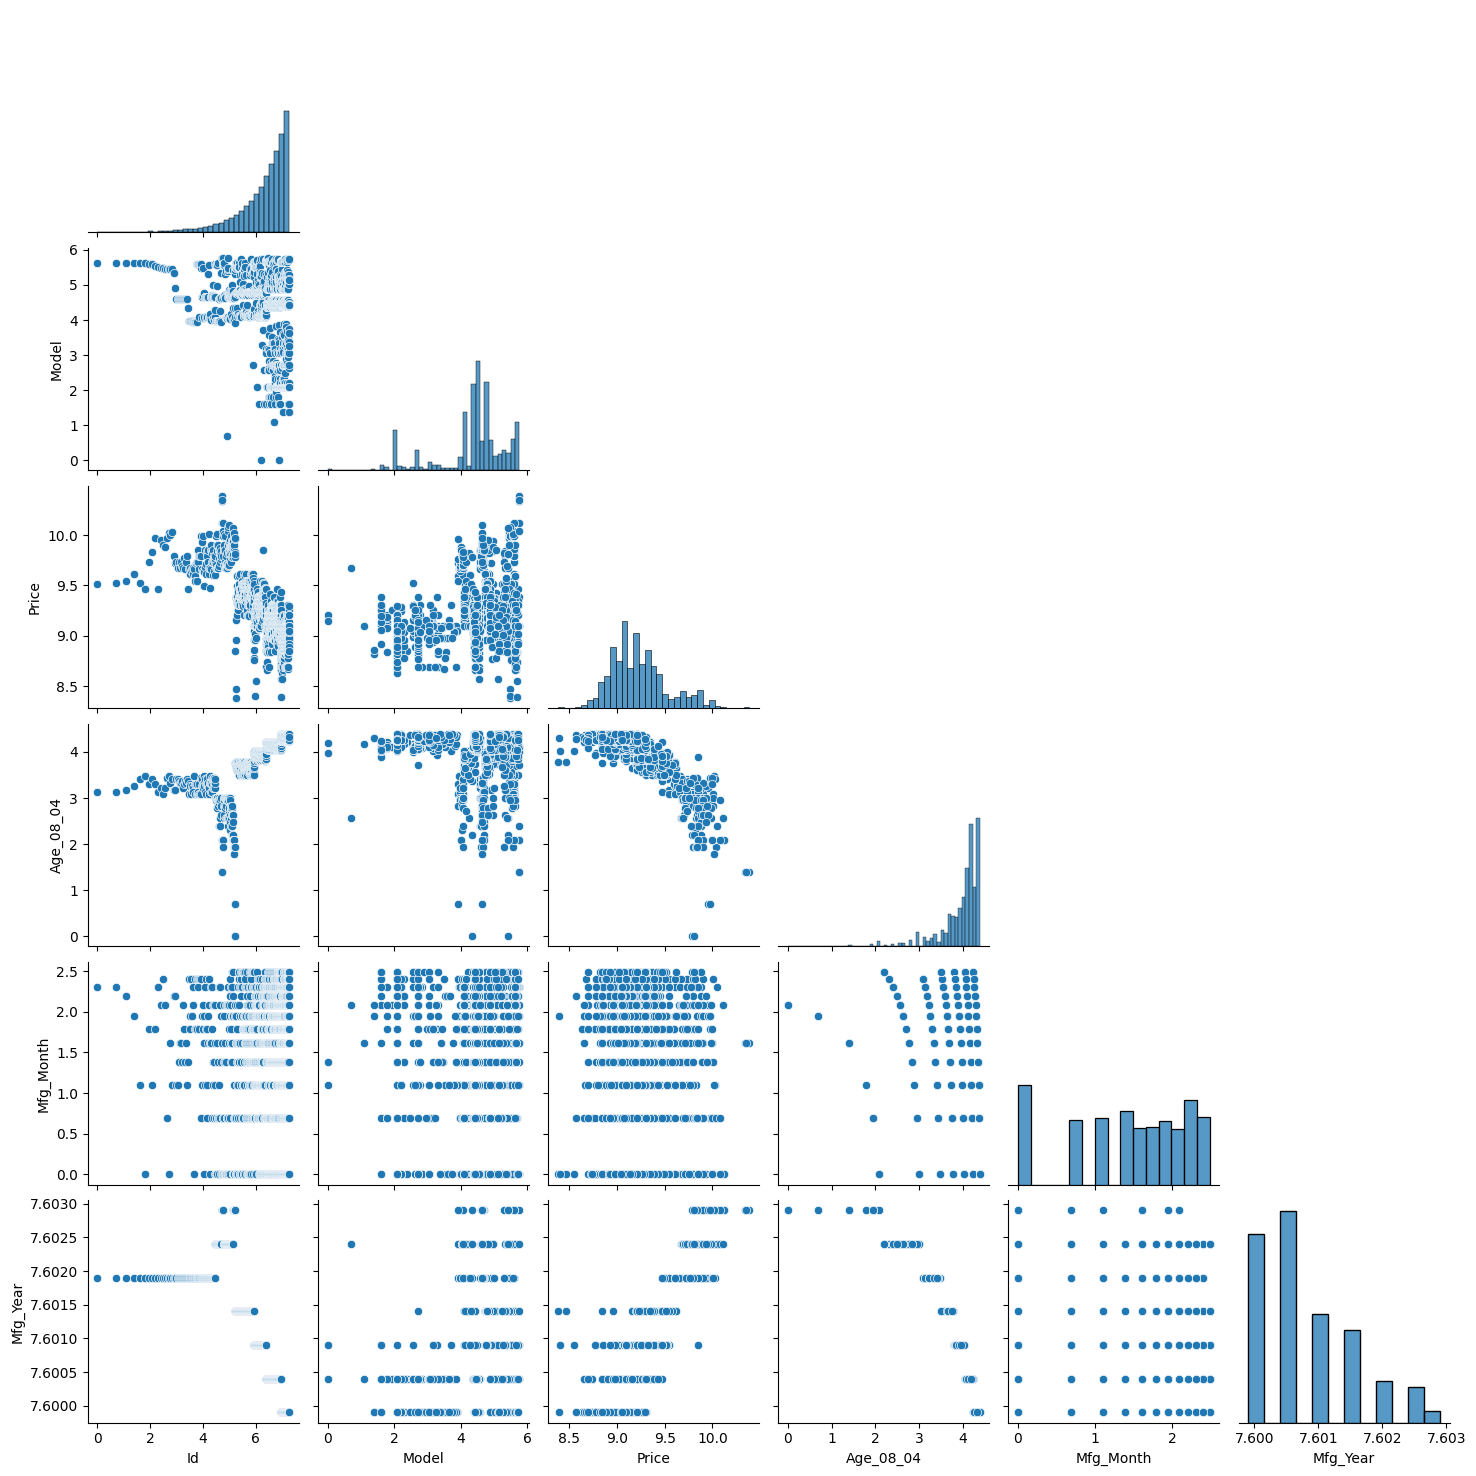

In [50]:
sns.pairplot(data_cl_tf.iloc[:, :6], corner=True)

In [ ]:
# data_cl_tf.to_csv("ToyotaCorolla_Curated.csv", index=False)

## Data Modeling

### First product - Sale price prediction

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [53]:
data_cl_tf.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [56]:
# X = np.array( data_cl_tf.iloc[:, :-1] )
# y = np.array( data_cl_tf.iloc[:, -1] )

X = np.array( data_cl_tf.drop(['Price'], axis=1) )
y = np.array( data_cl_tf['Price'] )

print(X.shape, y.shape)

(1436, 38) (1436,)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

print ( X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(1148, 38) (288, 38) (1148,) (288,)


In [58]:
gbr = GradientBoostingRegressor(n_estimators=100)
gbr.fit (X_train, y_train)

GradientBoostingRegressor()

In [59]:
predictions = gbr.predict( X_test )
mse_score = mse(y_test, predictions)

print ("MSE: {0:.5f}".format(mse_score))

MSE: 0.01054


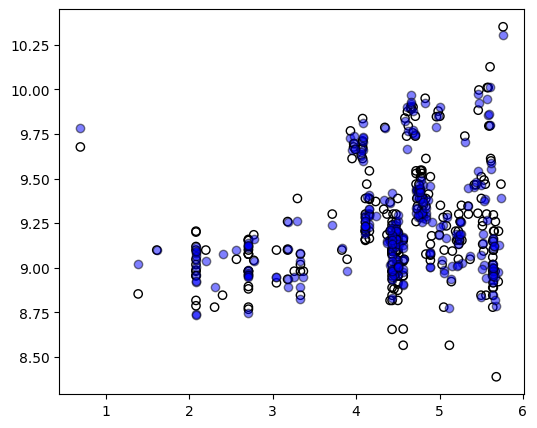

In [62]:
_, ax = plt.subplots(figsize=(6,5))
var_idx = 1
name_var = data_cl_tf.columns[var_idx]

ax.scatter(X_test[:, var_idx], y_test, facecolors="none", edgecolors='k')
ax.scatter(X_test[:, var_idx], predictions, c='b', alpha=0.5, edgecolors='k')

In [63]:
lrm = LinearRegression()
lrm.fit (X_train, y_train)

LinearRegression()

In [64]:
predictions = lrm.predict(X_test)
mse_score = mse(y_test, predictions)

print ("MSE: {0:.5f}".format(mse_score))

MSE: 0.01424


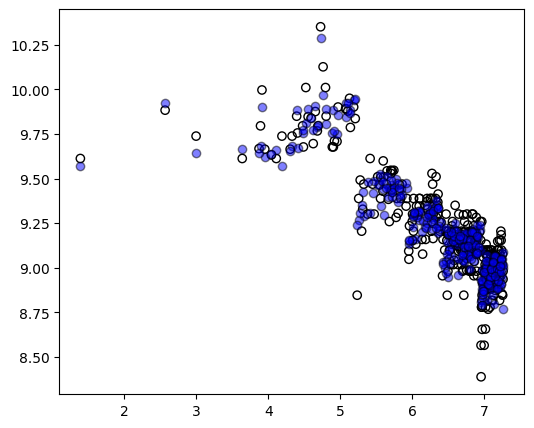

In [67]:
_, ax = plt.subplots(figsize=(6,5))
var_idx = 0
name_var = data_cl_tf.columns[var_idx]

ax.scatter(X_test[:, var_idx], y_test, facecolors="none", edgecolors='k')
ax.scatter(X_test[:, var_idx], predictions, c='b', alpha=0.5, edgecolors='k')

### Second product - Quality estimation

In [68]:
data_cl_tf.head(5)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,0.000000,5.613128,9.510445,3.135494,2.302585,7.601902,10.757605,0.0,4.49981,0,...,0,0,0,0,0,0,0,0,0,0
1,0.693147,5.613128,9.528794,3.135494,2.302585,7.601902,11.197351,0.0,4.49981,0,...,0,0,0,0,0,0,0,0,0,0
2,1.098612,5.613128,9.543235,3.178054,2.197225,7.601902,10.638520,0.0,4.49981,0,...,0,0,0,0,0,0,0,0,0,0
3,1.386294,5.613128,9.612467,3.258097,1.945910,7.601902,10.778956,0.0,4.49981,0,...,0,0,0,0,0,0,0,0,0,0
4,1.609438,5.609472,9.528794,3.401197,1.098612,7.601902,10.558414,0.0,4.49981,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_cl_tf2 = data_cl_tf.copy()

vals = np.unique(data_cl_tf['OverallQual'])
for i, val in enumerate(vals): data_cl_tf2['OverallQual'].replace(val, i, inplace=True)


In [ ]:
data_cl_tf2.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,4.094345,9.041922,5.0,1.609438,7.602401,7.602401,5.278115,6.559615,0.0,5.010635,...,0.000000,4.110874,0.000000,0.0,0.0,0.0,0.0,0.693147,7.604894,12.247694
1,2.995732,9.169518,4.0,2.079442,7.588830,7.588830,0.000000,6.885510,0.0,5.648974,...,5.697093,0.000000,0.000000,0.0,0.0,0.0,0.0,1.609438,7.604396,12.109011
2,4.094345,9.328123,5.0,1.609438,7.601402,7.601902,5.087596,6.186209,0.0,6.073045,...,0.000000,3.737670,0.000000,0.0,0.0,0.0,0.0,2.197225,7.604894,12.317167
3,4.248495,9.164296,5.0,1.609438,7.557473,7.585789,0.000000,5.375278,0.0,6.291569,...,0.000000,3.555348,5.605802,0.0,0.0,0.0,0.0,0.693147,7.603898,11.849398
4,4.094345,9.565214,6.0,1.609438,7.600902,7.600902,5.857933,6.484635,0.0,6.194405,...,5.257495,4.430817,0.000000,0.0,0.0,0.0,0.0,2.484907,7.604894,12.429216


In [ ]:
np.unique(data_cl_tf2['OverallQual'])

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

In [ ]:
data_cl_tf2.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
print (data_cl_tf2.columns)
X = np.concatenate([ data_cl_tf2.iloc[:, :2] , data_cl_tf2.iloc[:, 4:-1] ], axis=1)
y = np.array( data_cl_tf2.iloc[:, 2] )

print(X.shape, y.shape)

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
(1338, 33) (1338,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 33) (268, 33) (1070,) (268,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
lgr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=3)
svm = SVC(kernel='rbf', gamma=0.001)
gbc = GradientBoostingClassifier(n_estimators=100)

In [ ]:
models = [lgr, knn, svm, gbc]
names = ['Logistic regression', 'k-NN', 'SVM', "Decision Tree"]

for model in models:
  model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 ---- Model LogisticRegression() Report ---- 
              precision    recall  f1-score   support

         2.0       0.40      0.11      0.17        19
         3.0       0.62      0.73      0.67        79
         4.0       0.38      0.34      0.36        70
         5.0       0.40      0.50      0.44        62
         6.0       0.38      0.31      0.34        29
         7.0       0.33      0.20      0.25         5
         8.0       0.00      0.00      0.00         4

    accuracy                           0.47       268
   macro avg       0.36      0.31      0.32       268
weighted avg       0.45      0.47      0.45       268



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 ---- Model KNeighborsClassifier(n_neighbors=3) Report ---- 
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.14      0.16      0.15        19
         3.0       0.43      0.52      0.47        79
         4.0       0.39      0.36      0.37        70
         5.0       0.50      0.48      0.49        62
         6.0       0.48      0.34      0.40        29
         7.0       0.50      0.20      0.29         5
         8.0       1.00      0.25      0.40         4

    accuracy                           0.41       268
   macro avg       0.43      0.29      0.32       268
weighted avg       0.43      0.41      0.42       268



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 ---- Model SVC(gamma=0.001) Report ---- 
              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00        19
         3.0       0.51      0.62      0.56        79
         4.0       0.30      0.30      0.30        70
         5.0       0.37      0.61      0.46        62
         6.0       0.00      0.00      0.00        29
         7.0       0.00      0.00      0.00         5
         8.0       0.00      0.00      0.00         4

    accuracy                           0.40       268
   macro avg       0.17      0.22      0.19       268
weighted avg       0.32      0.40      0.35       268



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 ---- Model GradientBoostingClassifier() Report ---- 
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.30      0.16      0.21        19
         3.0       0.62      0.62      0.62        79
         4.0       0.48      0.57      0.52        70
         5.0       0.59      0.55      0.57        62
         6.0       0.52      0.45      0.48        29
         7.0       0.00      0.00      0.00         5
         8.0       0.67      0.50      0.57         4

    accuracy                           0.53       268
   macro avg       0.40      0.36      0.37       268
weighted avg       0.53      0.53      0.53       268



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


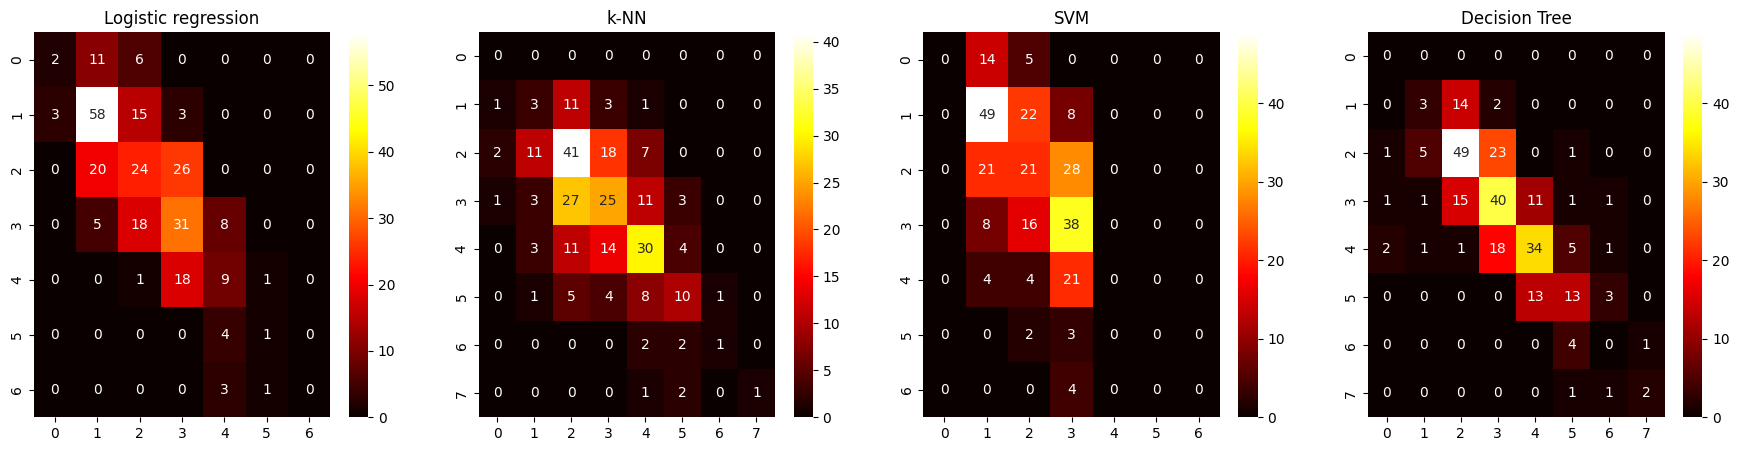

In [ ]:
_, axes = plt.subplots(1,len(models), figsize=(len(models)*5+2,5))

for ax, model, name in zip(axes, models, names):
  predictions = model.predict(X_test)
  cm = confusion_matrix(y_test, predictions) #, normalize='all'
  # cm = cm/cm.sum(axis=1)

  print (" ---- Model {0} Report ---- ".format(model))
  print (classification_report(y_test, predictions))
  sns.heatmap(cm, annot=True, cmap='hot', ax=ax)
  ax.set_title(name)

### Handling inbalanced data

In [ ]:
np.unique(y_test,return_counts=True)

(array([2., 3., 4., 5., 6., 7., 8.]), array([19, 79, 70, 62, 29,  5,  4]))

In [ ]:
print (data_cl_tf2.columns)
X = np.concatenate([ data_cl_tf2.iloc[:, :2] , data_cl_tf2.iloc[:, 4:-1] ], axis=1)
y = np.array( data_cl_tf2.iloc[:, 2] )

print(X.shape, y.shape)

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
(1338, 33) (1338,)


In [ ]:
from sklearn.utils import resample

X_resampled, y_resampled = [], []

for i in range(len(np.unique(y_test))):
  # Upsample minority class
  Xr, yr = resample(X[y==i], y[y==i],
                  n_samples=79,    # to match majority class
                  random_state=1)  # reproducible results

  X_resampled.extend(Xr)
  y_resampled.extend(yr)

X_resampled = np.array(X_resampled)
y_resampled = np.array(y_resampled)

In [ ]:
np.unique(y_resampled,return_counts=True)


(array([0., 1., 2., 3., 4., 5., 6.]), array([79, 79, 79, 79, 79, 79, 79]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state = 1)

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(442, 33) (111, 33) (442,) (111,)


In [ ]:
lgr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='rbf', gamma=0.1)
gbc = GradientBoostingClassifier(n_estimators=100)

In [ ]:
models = [lgr, knn, svm, gbc]
names = ['Logistic regression', 'k-NN', 'SVM', "Decision Tree"]

for model in models:
  model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 ---- Model LogisticRegression() Report ---- 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       0.69      1.00      0.82         9
         2.0       0.36      0.27      0.31        15
         3.0       0.50      0.44      0.47        18
         4.0       0.35      0.50      0.41        14
         5.0       0.69      0.39      0.50        23
         6.0       0.55      0.79      0.65        14

    accuracy                           0.59       111
   macro avg       0.59      0.63      0.59       111
weighted avg       0.61      0.59      0.58       111

 ---- Model KNeighborsClassifier() Report ---- 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       0.56      1.00      0.72         9
         2.0       0.41      0.47      0.44        15
         3.0       0.47      0.39      0.42        18
         4.0       0.26      0.36     

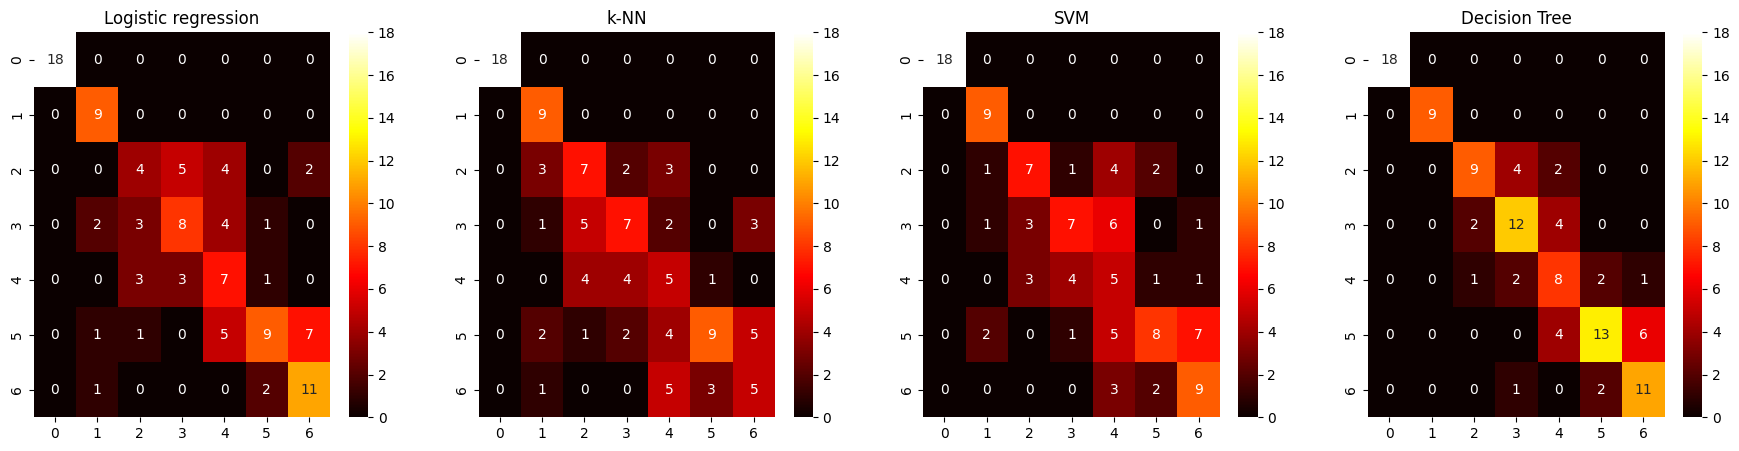

In [ ]:
_, axes = plt.subplots(1,len(models), figsize=(len(models)*5+2,5))

for ax, model, name in zip(axes, models, names):
  predictions = model.predict(X_test)
  cm = confusion_matrix(y_test, predictions) #, normalize='all'
  # cm = cm/cm.sum(axis=1)

  print (" ---- Model {0} Report ---- ".format(model))
  print (classification_report(y_test, predictions))
  sns.heatmap(cm, annot=True, cmap='hot', ax=ax)
  ax.set_title(name)